In [ ]:
import os
import pandas as pd

import numpy as np
from numpy import exp
from numpy import log
from numpy import sqrt
from numpy import power
import matplotlib.pyplot as plt

import scipy
from scipy import special

import math
from math import pi
from math import erf
from math import erfc



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks/UOWC")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/UOWC'

In [ ]:
# def Add_noise(x,SNR):
  # batch_size, len_x = x.shape
  # Ps = np.sum(np.power(x, 2)) / len_x
  # Pn = Ps / (np.power(10, SNR / 10))
  # noise = np.random.randn(len_x) * np.sqrt(Pn)
  # return x + noise

In [ ]:

def Simulated_dataset(SNR,Z,P):
  """

  Args:
    SNR: signl to noise ratios
    Z: channel lenth
    P: transmission power

  Returns:S_1,S_0,Denm_trm1,Denm_trm0,Threshold_optimal
   the function returns: numrical signal of bit 1 bit 0 , standard divation of bit 1 noise ,bit 0 noise,optimal Threshold

  """
  ######## Receiver SiPM ::MICROFC−SMTPA−30035
  PDE = 0.31 #photo detection efficiency 3mm Sensor 35um - 30035, overvoltage @ 2.5V
  lamda=420e-9 #Wavelength of Blue light
  A=0.0058  #SiPM surface area
  G=3e6 #Gain
  pap=0.002 #probability of afterpulsing
  pct=0.07 #probability of crosstalk
  dCR=300 #dark count rate6.6*10^6
  c=2.25e8 #light speed
  hp=6.626e-34  # Planck's constant h,
  e=1.6e-19  # Charge of Electron
  Nspad=4774 #  number of SPAD (microcells)
  td= 82e-9  #  tau_d deadtimex

  P_AP=1+pap #  probability of current
  P_XT = 1 + pct
  
  Res=PDE*lamda*G*e*P_AP*P_XT/(hp*c)  # what? SiPM responsitivity
  Fe=1.1  # funtion of the doping profile

  #  Laser Diode Parameters
  ext=0.33 # extinction ratio
  Ptx1 =(1-ext)*P  #[0.25,0.40,0.5] #  power of bit 1 in watt
  Ptx0=ext*P    # 0.0008   wpower of bit 0 in watt
  
  ce = 0.551 ##channel loss diffuse coefficient
  Rb = 10e6#[10,30,60]e6 #transmitt data rate
  RL = 1000 #load resistance
  Lch=math.exp(-ce*Z) # channel loss
  h_L=Lch # channel loss factor
  lenth=int(1e4)#  length of the signal and noise

#####total channel gain
  h_gain = h_L #*h_P#*h_T without turbulence without pointing error
#######    noise  ######
  sgma2_0_tn = Ptx0/power(10,SNR/10) #variance of the total signal noise for bit 1
  sgma2_1_tn = Ptx1/power(10,SNR/10) #variance of the total signal noise for bit 0
  #the noise  of bit 1 is normaly distributed
  Noise_0 = np.random.normal(0, np.sqrt(sgma2_0_tn), lenth)
  Noise_1 = np.random.normal(0, np.sqrt(sgma2_1_tn), lenth)
  print("Noise",Noise_0)
####The optical signal received by the SiPM after underwater propagation
  S_R0 = Res*h_gain*Ptx0 + Noise_0
  S_R1 = Res*h_gain*Ptx1 + Noise_1 
####the input signals to the demodulator corresponding to “0” and “1” bits,
  S_0 = RL*S_R0*1e-8 # nurmical simulated current of bit 1
  S_1 = RL*S_R1*1e-8# nurmical simulated current of bit 0
#
  Denm_trm1 = sqrt(sgma2_1_tn) # standard deviation of bit 1
  Denm_trm0 = sqrt(sgma2_0_tn) # standard deviation of bit 0

#### Here calculate the optimal threshold
  Threshold_optimal = (S_0*sgma2_1_tn - S_1*sgma2_0_tn)/(sgma2_1_tn-sgma2_0_tn) + np.sqrt((power(S_1,2)*sgma2_0_tn)/(sgma2_1_tn-sgma2_0_tn) + power((S_0*sgma2_1_tn
    - S_1*sgma2_0_tn)/(sgma2_1_tn-sgma2_0_tn),2) - (power(S_0,2)*sgma2_1_tn)/(sgma2_1_tn - sgma2_0_tn)
     - ((sgma2_0_tn*sgma2_1_tn)/(sgma2_1_tn - sgma2_0_tn))*log(sgma2_0_tn/sgma2_1_tn) )

  return S_1,S_0,Denm_trm1,Denm_trm0,Threshold_optimal


In [ ]:
#####test
SNR = 20
Z = 1
P = 0.25#[0.25,0.40,0.5]
N_s1,N_s0,D_s1,D_s0,Threshold = Simulated_dataset(SNR,Z,P)

Avg_BER1=[]
Avg_BER_Inst =  0.25*special.erfc(((Threshold - N_s0)/D_s0)) +0.25*special.erfc(((N_s1 - Threshold)/D_s1))
Avg_BER1.append(np.mean(Avg_BER_Inst))
print("Threshold",Threshold)
print('N_s1',N_s1)
print('N_s0',N_s0)

print("Avg_BER1",Avg_BER1)
print()
plt.plot(N_s0)

NameError: name 'Simulated_dataset' is not defined

0.5763731489488771


<ipython-input-87-23cc82c41636>:105: RuntimeWarning: invalid value encountered in divide
  Threshold_opt = ((((Is_0msm0*h_gain)+ I_d + I_b)*
<ipython-input-87-23cc82c41636>:107: RuntimeWarning: invalid value encountered in divide
  ((sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)-(sgma2_0sm0*h_gain + sgma2_dth + sigma2_b))+sqrt((((Is_0msm0*h_gain+ I_d + I_b)*
<ipython-input-87-23cc82c41636>:109: RuntimeWarning: divide by zero encountered in divide
  (sgma2_0sm0*h_gain + sgma2_dth + sigma2_b))/((sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)-(sgma2_0sm0*h_gain +sgma2_dth + sigma2_b)))**2+(((Is_1msm1*h_gain)+ I_d + I_b)**2*
<ipython-input-87-23cc82c41636>:109: RuntimeWarning: invalid value encountered in divide
  (sgma2_0sm0*h_gain + sgma2_dth + sigma2_b))/((sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)-(sgma2_0sm0*h_gain +sgma2_dth + sigma2_b)))**2+(((Is_1msm1*h_gain)+ I_d + I_b)**2*
<ipython-input-87-23cc82c41636>:112: RuntimeWarning: divide by zero encountered in divide
  (sgma2_0sm0*h_gain + sgma2

[nan]
0.33220600682924445
[nan, 0.5]
0.19147462225590384
[nan, 0.5, 0.0]
0.11036083097343202
[nan, 0.5, 0.0, 0.5]
0.06360901966877178
[nan, 0.5, 0.0, 0.5, 1.0]
0.03666253096804106
[nan, 0.5, 0.0, 0.5, 1.0, 0.0]
0.02113129842248555
[nan, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0]
0.012179513013146433
[nan, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0]


<function matplotlib.pyplot.show(close=None, block=None)>

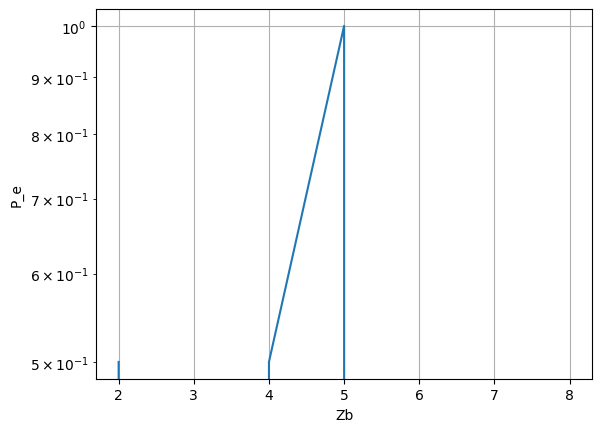

In [ ]:
######Application of the function
# SNR = np.linspace(0,40,5)
Zb = np.linspace(1,8,8) # link range
# Rb = 10e6 #[10e6,30e6,60e6]
SNR = 30
P = 0.25
Avg_BER1=[]
for Z in Zb:
  N_s1,N_s0,D_s1,D_s0,Threshold = Simulated_dataset(SNR,Z,P)
  Avg_BER_Inst =  0.25*special.erfc(((Threshold - N_s0)/D_s0)) +0.25*special.erfc(((N_s1 - Threshold)/D_s1))
  # print(Avg_BER_Inst)
  Avg_BER1.append(np.mean(Avg_BER_Inst))
  # print(Threshold)
  print(Avg_BER1)
plt.semilogy(Zb,Avg_BER1)  # 对 result 取 log 后画线
plt.xlabel("Zb")
plt.ylabel("P_e")
plt.grid(True)
plt.show


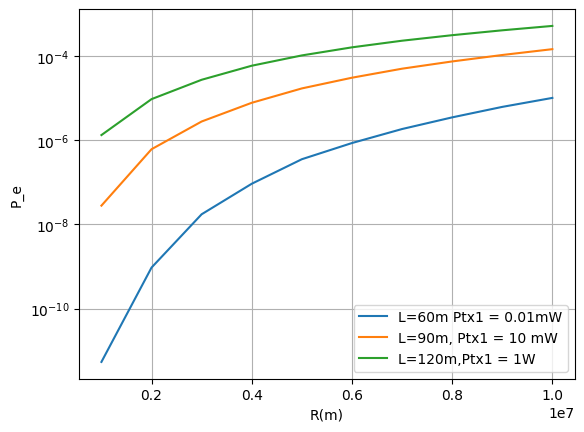

In [ ]:
import datetime

PDE=0.24 #photo detection efficiency #3mm Sensor 20um - 30020, overvoltage @ 2.5V
lamda=450e-9#Wavelength of Blue light
A=0.0044 #SiPM surface area
G=1e6


pap=0.002 #probability of afterpulsing
pct=0.0003 #probability of crosstalk
dCR=6.6e6 #dark count rate6.6*10^6
c=2.25e8
hp=6.626e-34  # Planck's constant h,
e=1.6e-19  # Charge of Electron
Nspad=10998 #  #number of SPAD (microcells)
td= 100e-9  #  #tau_d deadtimex

Pac=1+pap+pct # # probability of current
Res=PDE*lamda*G*e*Pac/(hp*c)  ## SiPM responsitivity
Fe=1.1  # funtion of the doping profile

#  #Laser Diode Parameters

ext=0.4 # #extinction ratio
#  # Ptx1=0.002 #  #power of bit 1 in watt
#  # Ptx0=ext*Ptx1 # #0.0008   #power of bit 0 in watt
Ptx = [0.0001,0.01,1]
ce=0.151 # #diffuse coefficient of attenuation for clear waters
# Rb1 = np.linspace(1, 10, num=10, endpoint=True, retstep=False, dtype=None)*1e6
Rb1 =
Zb = [60,90,120]# link range
L_Zb = len(Zb)
# L_Rb = len(Rb)

for i in range(L_Zb):
  Z = Zb[i]
  Ptx1=Ptx[i] #  #power of bit 1 in watt
  Ptx0=ext*Ptx1#三个长度，三个能量强度
  Avg_BER1 = []#
  for Rb in Rb1:
    # Rb=1*1e6
    # Rb = Rb[b] # choose the bit rate
    Lch=math.exp(-ce*Z) # #channel loss #diffuse coefficient ce
    h_L=Lch # channel loss factor

##  # # Turbulence
    lenth=int(1e7)# # #length of the signal
    muuT=-0.3516#  # # mean of log-amplitude coefﬁcient of turbulence
    # sigmaaT=0.8386#  # #variance of log-amplitude coefﬁcient of turbulence
    SigmaaTT = [0.7032,0.9872,1.21]
    sigmaaT = SigmaaTT[i]

    gen_Norm_numbers_YT=np.random.normal(muuT, sigmaaT, [lenth,1])

    h_T1=np.exp(gen_Norm_numbers_YT)
    h_T=h_T1#Turbulence factor,Its a distribution
    ## pointing errors

    sigma_rp = 0.2 #linspace(0.2,2,10)  #(1:1:10)*1e-1
#   # #variance of radial displacement of the transmitted beam spot at L from the
#   #center of the Rx lens
    r_p = np.random.rayleigh(sigma_rp,[lenth,1])
    A_apr = A# #A   #pi*r_apr**2 Pi*r^2  #Area of lens  #SiPM surface area
    r_apr = np.sqrt(A_apr/math.pi)#radius of lens
    D_apr = 2*r_apr #diameters of lens

    div_angle = 0.13 #divergence angle
    w_z=div_angle*Z # approximation of beam width

    v_sm=(np.sqrt(pi)*r_apr)/(np.sqrt(2)*w_z) # variables

    A_0 = np.power((erf(v_sm)),2) #factor at no pointing error

    w_zeq2 = (w_z**2*np.sqrt(pi)*erf(v_sm))/(2*v_sm*exp(-v_sm**2)) #equivalent beam width

    h_P = A_0*np.exp((-2*power(r_p,2))/w_zeq2) #pointing error facor

    #  # # total channel gain

    h_gain = h_L*h_P#h_T - no pointing error
#  # # noise
    #  # #bandwith
    Br=Rb/2# #1e7  # receiver low-pass filter Bandwidth / bandwidth of the receiver low-pass filter Be=1e9   #PD bandwidth (in Hz)(Electrical bandwidth)/ bandwidth of the receiver low-pass filter
    RL=1000 #  #load resistor of TIA ohms
    K=1.38064852e-23#  # boltzman constant (m2 kg s-2 K-1)
    Te=300 # equivqlent noise temperature [K]
    sgmath2=4*K*Te*Br/RL # #thermal noise variance

    Bo=2e-9 #Optical 'filter' bandwidth  at the Rx
    Esun_lamda_0=0.2/(1e-9) #Spectral radiance of the background radiations
    tw=0.97 #water transmittance h_prime 0.95

    # Kd=0.08 #diffuse coefficient of attenuation for clear waters
    # h_Lb=exp(-Kd*Z) #channel loss

    I_b = 0 #no solar noise  #Res*Pb*RL
    sigma2_b = 0  #no solar noise  #2*e*G*Fe*Br*I_b*RL

#  # # # # # # # # # # # # # #Considering Optimal Threshold for an SiPM Output Photocurrent # # # # # # # # # # # # # # #
    Is_1msm1=Res*Ptx1*RL

    I_d=dCR*Pac*G*e*RL

    Is_0msm0=ext*Is_1msm1

    coeff=2*e*G*Fe*Br

    sgma2_d=coeff*I_d

    sgma2_dth=sgma2_d*RL + sgmath2

    sgma2_1sm1=coeff*Is_1msm1*RL

    sgma2_0sm0=coeff*Is_0msm0*RL
#  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # BER  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

    Threshold_opt = ((((Is_0msm0*h_gain)+ I_d + I_b)*
     (sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)-((Is_1msm1*h_gain)+ I_d + I_b)*(sgma2_0sm0*h_gain + sgma2_dth + sigma2_b))/
      ((sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)-(sgma2_0sm0*h_gain + sgma2_dth + sigma2_b))+sqrt((((Is_0msm0*h_gain+ I_d + I_b)*
       (sgma2_1sm1*h_gain+ sgma2_dth + sigma2_b)-(Is_1msm1*h_gain+ I_d + I_b)*
        (sgma2_0sm0*h_gain + sgma2_dth + sigma2_b))/((sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)-(sgma2_0sm0*h_gain +sgma2_dth + sigma2_b)))**2+(((Is_1msm1*h_gain)+ I_d + I_b)**2*
         (sgma2_0sm0*h_gain + sgma2_dth + sigma2_b)-
          ((Is_0msm0*h_gain)+ I_d + I_b)**2*(sgma2_1sm1*h_gain +sgma2_dth + sigma2_b))/((sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)-
           (sgma2_0sm0*h_gain + sgma2_dth + sigma2_b))-(((sgma2_0sm0*h_gain + sgma2_dth + sigma2_b)*(sgma2_1sm1*h_gain +
           sgma2_dth + sigma2_b))/((sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)-(sgma2_0sm0*h_gain + sgma2_dth + sigma2_b)))*
            (log((sgma2_0sm0*h_gain + sgma2_dth + sigma2_b)/(sgma2_1sm1*h_gain + sgma2_dth + sigma2_b)))))
    Numr_trm1 = (Is_1msm1*h_gain)+ I_d + I_b# #nurmical simulated current of bit 1

    Denm_trm1 =  sqrt(2*((sgma2_1sm1*h_gain) + sgma2_dth + sigma2_b))

    Numr_trm0 = (Is_0msm0*h_gain)+ I_d + I_b

    Denm_trm0 =  sqrt(2*((sgma2_0sm0*h_gain) + sgma2_dth + sigma2_b))

    Avg_BER_Inst =  0.25*special.erfc(((Threshold_opt - Numr_trm0)/Denm_trm0)) +0.25*special.erfc(((Numr_trm1 - Threshold_opt)/Denm_trm1))


    Avg_BER1.append(np.mean(Avg_BER_Inst))
    # legends()
  labels = ["L=60m Ptx1 = 0.01mW","L=90m, Ptx1 = 10 mW","L=120m,Ptx1 = 1W"]

  plt.semilogy(Rb1,Avg_BER1,label=labels[i])  # 对 result 取 log 后画线
  plt.xlabel("R(m)")
  plt.ylabel("P_e")
  # plt.title("log-line")
plt.legend()
plt.grid(True)  # 显示网格线
plt.show()



In [ ]:
SNR = np.linspace(0,40,5)
SNR

array([ 0., 10., 20., 30., 40.])